# Absolute Price Oscillator (APO)

https://library.tradingtechnologies.com/trade/chrt-ti-absolute-price-oscillator.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,196.668900,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,202.417679,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,203.003281,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,204.057388,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,202.144379,25587400


In [3]:
df['HL'] = (df['High'] + df['Low'])/2
df['HLC'] = (df['High'] + df['Low'] + df['Adj Close'])/3
df['HLCC'] = (df['High'] + df['Low'] + df['Adj Close'] + df['Adj Close'])/4
df['OHLC'] = (df['Open'] + df['High'] + df['Low'] + df['Adj Close'])/4

In [4]:
df['Long_Cycle'] = df['Adj Close'].rolling(20).mean()
df['Short_Cycle'] = df['Adj Close'].rolling(5).mean()
df['APO'] = df['Long_Cycle'] - df['Short_Cycle'] 

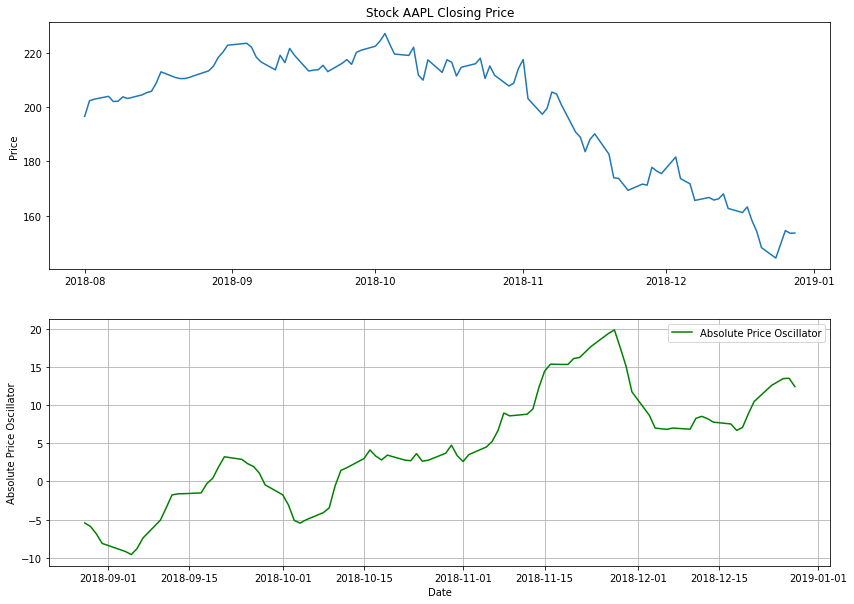

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['APO'], label='Absolute Price Oscillator', color='green')
ax2.grid()
ax2.set_ylabel('Absolute Price Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Absolute Price Oscillator (APO)

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

TypeError: dtype '<class 'datetime.date'>' not understood

In [ ]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['APO'], label='Absolute Price Oscillator', color='green')
ax2.grid()
ax2.set_ylabel('Absolute Price Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')